**Colab The Drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Importing Libraries**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

In [3]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import splitfolders
splitfolders.ratio("../content/gdrive/My Drive/brain_tumor_dataset", output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 265 files [00:05, 51.76 files/s] 


In [7]:
train_path="/content/output/train"
val_path="/content/output/val"
test_path="/content/output/test"
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)

list = os.listdir("/content/output/train/yes") + os.listdir("/content/output/train/no") # dir is your directory path
Total_Traindata = len(list)

list = os.listdir("/content/output/val/yes") + os.listdir("/content/output/val/no") # dir is your directory path
Total_Valdata = len(list)

list = os.listdir("/content/output/test/no") + os.listdir("/content/output/test/no") # dir is your directory path
Total_Testdata = len(list)

print (Total_Traindata)
print (Total_Valdata)
print (Total_Testdata)

212
26
20


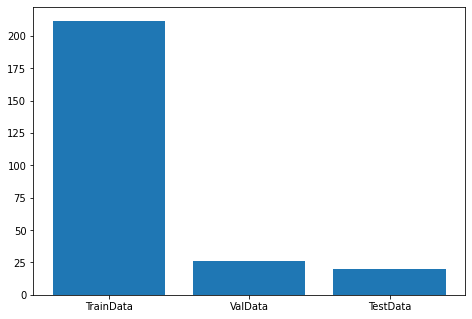

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['TrainData', 'ValData', 'TestData']
Data = [Total_Traindata,Total_Valdata,Total_Testdata ]
ax.bar(langs,Data)
plt.show()

In [13]:
labels = []
for i in os.listdir(train_path):
    labels+=[i]


In [14]:
labels

['yes', 'no']

**Displaying The Images**

In [15]:
import random
import matplotlib.image as mpimg
def load_random_imgs_from_folder(folder,label):
  plt.figure(figsize=(15,15))
  for i in range(3):
    file = random.choice(os.listdir(folder))
    image_path = os.path.join(folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,3,i+1)
    ax.title.set_text(label)
    plt.xlabel(f'Name: {file}')
    plt.imshow(img)

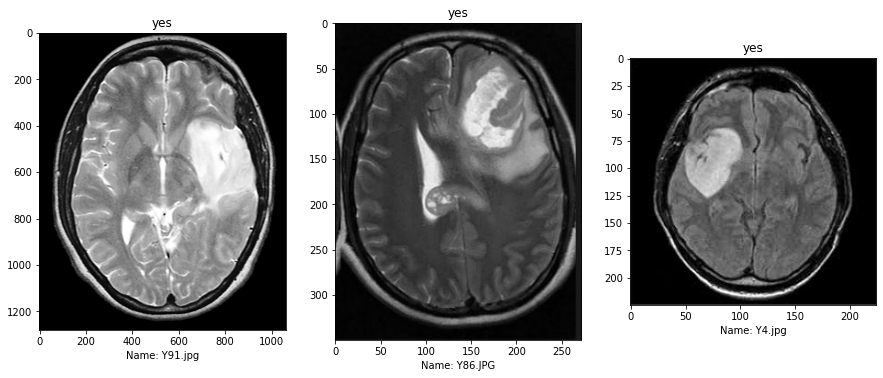

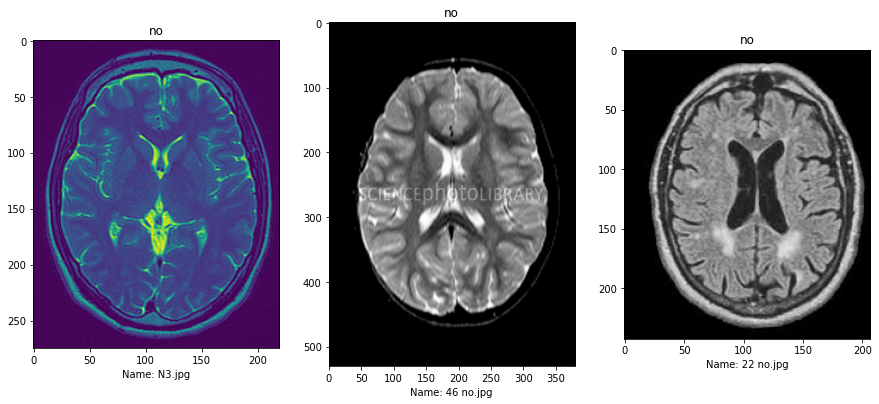

In [17]:
data_dir = "../content/gdrive/My Drive/brain_tumor_dataset"
for label in labels:
    load_random_imgs_from_folder(f"{data_dir}/{label}",label)

**Image Data Generator Data Pre Processing**


In [9]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_path,target_size=(331, 331),batch_size=32,shuffle=True,class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_path,target_size=(331,331),batch_size=32,shuffle=False,class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_path,target_size=(331,331),batch_size=32,shuffle=False,class_mode='binary')

Found 212 images belonging to 2 classes.
Found 26 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


In [10]:
from tensorflow.keras.applications import  NASNetLarge

model = NASNetLarge(
      input_shape = (331,331,3),
      include_top = False,
      weights = 'imagenet'
    )

343621632/343610240 [==============================] - 3s 0us/step


In [11]:
for layers in model.layers:
    layers.trainable = False

In [12]:
from keras.layers import  Dropout
x = Flatten()(model.output)
x = Dropout(0.5)(x)
x = Dense(1, activation = "sigmoid")(x)

model = keras.Model(model.input, x)
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 331, 331, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 165, 165, 96  2592        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 165, 165, 96  384         ['stem_conv1[0][0]']             
                                )                                                             

In [18]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [19]:
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model.h5', monitor='val_accuracy', mode='max' )

In [20]:
History = model.fit_generator(train_generator,validation_data = val_generator, epochs = 100, verbose=1,callbacks=[mc,es])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
7/7 [==============================] - 51s 3s/step - loss: 13.7674 - accuracy: 0.5708 - val_loss: 27.8249 - val_accuracy: 0.3846
Epoch 2/100
7/7 [==============================] - 14s 2s/step - loss: 12.1347 - accuracy: 0.6509 - val_loss: 6.8349 - val_accuracy: 0.6538
Epoch 3/100
7/7 [==============================] - 13s 2s/step - loss: 8.0915 - accuracy: 0.7075 - val_loss: 4.3076 - val_accuracy: 0.7692
Epoch 4/100
7/7 [==============================] - 13s 2s/step - loss: 6.2203 - accuracy: 0.7500 - val_loss: 7.3684 - val_accuracy: 0.5385
Epoch 5/100
7/7 [==============================] - 15s 2s/step - loss: 5.0401 - accuracy: 0.6934 - val_loss: 6.5060 - val_accuracy: 0.5769
Epoch 6/100
7/7 [==============================] - 14s 2s/step - loss: 4.2913 - accuracy: 0.7264 - val_loss: 3.7733 - val_accuracy: 0.5385
Epoch 7/100
7/7 [==============================] - 13s 2s/step - loss: 4.3570 - accuracy: 0.6840 - val_loss: 4.3026 - val_accuracy: 0.6923
Epoch 8/100
7/7 [=======

In [21]:
hist = History.history


Text(0, 0.5, 'accuracy')

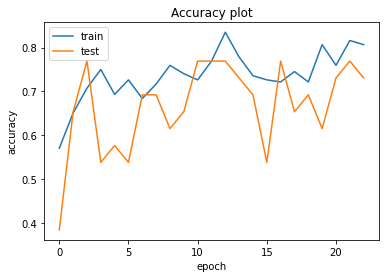

In [22]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

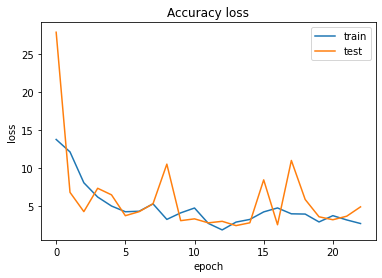

In [23]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [24]:
model.load_weights("/content/gdrive/My Drive/best_model.h5")

In [25]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[5.4218831062316895, 0.7037037014961243]

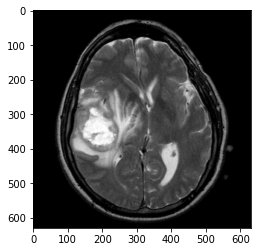

In [26]:
from cv2 import imread
yes_path = test_path+"/yes/"+os.listdir(test_path+"/yes/")[9]

tumour = imread(yes_path)
image_resized= cv2.resize(tumour, (331 ,331))
image=np.expand_dims(image_resized,axis=0)
plt.imshow(tumour)

In [28]:
pred=model.predict(image)

output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

[[1.]]
The predicted class is yes
